# 一.Pre-processing

### 1.1 data clean

In [411]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import configparser
import random
import re
import nltk
from nltk.stem import SnowballStemmer

In [412]:
df=pd.read_csv('quora_train.csv')

In [413]:
df_2 = pd.read_csv('quora_test.csv')

In [414]:
quora_train_data=df.drop(['Unnamed: 0'],axis=1)

In [415]:
quora_test_data=df_2.drop(['Unnamed: 0'],axis=1)

In [416]:
quora_train_data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,195840,386541,386542,How does banning 500 & 1000 rupee notes solve ...,Will the ban on 500 & 1000 rupee notes really ...,1
1,252241,496583,496584,What is the hardest thing(s) about raising chi...,What is the hardest thing(s) about raising chi...,0
2,249224,490718,490719,Who are Utopia's top competitors?,Who are Axis 41's top competitors?,0
3,125536,248723,248724,I want to improve my reading skill by reading ...,How can reading newspaper help me improve my E...,0
4,390237,762803,762804,How do I gain weight in naturally way?,How to gain weight ?,1


In [417]:
quora_test_data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,384611,752053,752054,What are the pros and cons of Legalzoom-genera...,Where can I read reviews of LegalZoom?,0
1,258398,508576,508577,Why does ready-to-eat poha absorb water instan...,Ultimate teen patti hacker?,0
2,234932,462847,462848,How apps like paytm earn profit when they are ...,How does Paytm earn by giving extra cash back ...,1
3,347622,681123,681124,What daily habits can greatly upgrade life?,What are your daily habits that improve your p...,1
4,388186,758881,758882,What video game world would you want to live in?,"If you could live in any video game setting, w...",1


In [418]:
quora_train_data.shape

(323480, 6)

In [419]:
quora_test_data.shape

(80871, 6)

In [420]:
quora_train_data.info()
#question1 and question2 323479<323480 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323480 entries, 0 to 323479
Data columns (total 6 columns):
id              323480 non-null int64
qid1            323480 non-null int64
qid2            323480 non-null int64
question1       323479 non-null object
question2       323479 non-null object
is_duplicate    323480 non-null int64
dtypes: int64(4), object(2)
memory usage: 14.8+ MB


In [421]:
quora_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80871 entries, 0 to 80870
Data columns (total 6 columns):
id              80871 non-null int64
qid1            80871 non-null int64
qid2            80871 non-null int64
question1       80871 non-null object
question2       80870 non-null object
is_duplicate    80871 non-null int64
dtypes: int64(4), object(2)
memory usage: 3.7+ MB


In [422]:
#data statistic
quora_train_data.describe()

,id,qid1,qid2,is_duplicate
count,323480.000000,323480.000000,323480.000000,323480.000000
mean,202234.738676,391988.148621,390308.566060,0.369813
std,116749.382781,228478.559264,228854.727869,0.482755
min,0.000000,1.000000,2.000000,0.000000
25%,101231.750000,193687.500000,191199.500000,0.000000
50%,202355.500000,390901.000000,388784.000000,0.000000
75%,303404.250000,589769.500000,588250.500000,1.000000
max,404350.000000,789800.000000,789801.000000,1.000000


###data preprocessing

In [423]:
quora_train_data.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

##duplicate check

In [424]:
quora_train_data.duplicated() 

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
323450    False
323451    False
323452    False
323453    False
323454    False
323455    False
323456    False
323457    False
323458    False
323459    False
323460    False
323461    False
323462    False
323463    False
323464    False
323465    False
323466    False
323467    False
323468    False
323469    False
323470    False
323471    False
323472    False
323473    False
323474    False
323475    False
323476    False
323477    False
323478    False
323479    False
Length: 323480, dtype: b

In [425]:
quora_train_data[quora_train_data.duplicated()]  #no dupicate

,id,qid1,qid2,question1,question2,is_duplicate


In [426]:
quora_train_data.duplicated().sum() #double check

0

In [427]:
quora_test_data.duplicated().sum()

0

### missing data

In [428]:
quora_train_data.isnull()

,id,qid1,qid2,question1,question2,is_duplicate
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


In [429]:
quora_train_data.isnull().sum() #查看缺失值的位置

id              0
qid1            0
qid2            0
question1       1
question2       1
is_duplicate    0
dtype: int64

In [430]:
quora_test_data.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       1
is_duplicate    0
dtype: int64

In [431]:
quora_train_data[quora_train_data.question1.isnull()] #question1-missing data

,id,qid1,qid2,question1,question2,is_duplicate
219751,363416,711434,711435,NaN,My Chinese name is Haichao Yu. What English na...,0


In [432]:
quora_train_data['question1'].fillna('Empty',inplace=True)

In [433]:
quora_train_data[quora_train_data.question2.isnull()] #question2--missing data

,id,qid1,qid2,question1,question2,is_duplicate
182601,105796,209841,209842,How can I develop android app?,NaN,0


In [434]:
quora_train_data['question2'].fillna('Empty',inplace=True)

In [435]:
quora_test_data[quora_test_data.question2.isnull()]

,id,qid1,qid2,question1,question2,is_duplicate
1495,201871,398348,398349,How can I create an Android app?,NaN,0


In [436]:
quora_test_data['question2'].fillna('Empty',inplace=True)

In [437]:
quora_train_data.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [438]:
quora_test_data.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [439]:
quora_train_data.loc[quora_train_data['question1']=='Empty']

,id,qid1,qid2,question1,question2,is_duplicate
219751,363416,711434,711435,Empty,My Chinese name is Haichao Yu. What English na...,0


In [440]:
quora_train_data.shape

(323480, 6)

In [441]:
quora_train_data["is_duplicate"].value_counts()

0    203853
1    119627
Name: is_duplicate, dtype: int64

In [442]:
quora_test_data["is_duplicate"].value_counts()

0    51192
1    29679
Name: is_duplicate, dtype: int64

In [443]:
quora_train_data.loc[quora_train_data['question1']=='How do I prevent breast cancer?']

,id,qid1,qid2,question1,question2,is_duplicate
11087,76,153,154,How do I prevent breast cancer?,Is breast cancer preventable?,0
149459,344183,674547,674548,How do I prevent breast cancer?,What we can do to prevent breast cancer mostly?,1


In [444]:
#printing few question pairs in the datset
for i in range(0,20):
    print(quora_train_data.question1[i])
    print(quora_train_data.question2[i])
    print()

How does banning 500 & 1000 rupee notes solve black money problem?
Will the ban on 500 & 1000 rupee notes really work against corruption?

What is the hardest thing(s) about raising children in Georgia?
What is the hardest thing(s) about raising children in Mexico?

Who are Utopia's top competitors?
Who are Axis 41's top competitors?

I want to improve my reading skill by reading English news every day. What are recommended newspapers or magazines?
How can reading newspaper help me improve my English?

How do I gain weight in naturally way?
How to gain weight ?

What is Dubai Shopping Festival?
When is dubai shopping festival?

What is your favorite Bob Marley song and why?
Which is your favourite Bob Marley Song?

How do you get rid of a virus on an iPhone?
How do I get rid of a virus on my iPhone?

Are most of the answers on Quora are hypocrite?
What are some of the most sexist answers on Quora?

What kind of rock is this?Length is 22 inches and 44 inches around the largest part of t

## 1.2 Simply dropped null values, split each of the question strings and removed stops

In [445]:
from string import punctuation
import scipy #library for scientific calculations
import datetime
import nltk
from sklearn import re
from sklearn import pipeline
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score

In [446]:
SPECIAL_TOKENS = {'non-ascii': 'non_ascii_word'}

In [447]:
def normalized_text(text, stem_words=True):
    def pad_str(s):
        return ' '+s+' '
    
    if pd.isnull(text):  #If null
        return ''

    # Empty question
    
    if type(text) != str or text=='':  #if text type is not string
        return ''

    # Clean the text-acronym 
    text = re.sub("\'s", " ", text) # we have cases like "Sam is" or "Sam's" (i.e. his) these two cases aren't separable, I choose to compromise are kill "'s" directly
    text = re.sub(" whats ", " what is ", text, flags=re.IGNORECASE) # replace whats by what is and ignore case
    text = re.sub("\'ve", " have ", text) # replace 've by have
    text = re.sub("can't", "can not", text) # replace can't by can not
    text = re.sub("cannot", "can not ", text)
    text = re.sub("n't", " not ", text) # replace n't by not
    text = re.sub("i'm", "i am", text, flags=re.IGNORECASE) # replace i'm by i am and ignore case
    text = re.sub("I\'m", "i am ", text)
    text = re.sub("\'re", " are ", text) # replace 're by are
    text = re.sub("\'d", " would ", text) # replace 'd by would
    text = re.sub("\'ll", " will ", text) # replace 'll by will
    text = re.sub("e\.g\.", " eg ", text, flags=re.IGNORECASE) # replace e.g. by eg and ignore case
    text = re.sub("b\.g\.", " bg ", text, flags=re.IGNORECASE) # replace b.g. by bg and ignore case
    text = re.sub("(\d+)(kK)", " \g<1>000 ", text) 
    text = re.sub("e-mail", " email ", text, flags=re.IGNORECASE)
    text = re.sub("e \- mail ", " email ", text)
    text = re.sub(" e mail ", " email ", text)
    text = re.sub("(the[\s]+|The[\s]+)?U\.S\.A\.", " America ", text, flags=re.IGNORECASE)
    text = re.sub("(the[\s]+|The[\s]+)?United State(s)?", " America ", text, flags=re.IGNORECASE)
    text = re.sub("\(s\)", " ", text, flags=re.IGNORECASE)
    text = re.sub("[c-fC-F]\:\/", " disk ", text)
    text = re.sub(r",000", '000', text)
    text = re.sub(r"c\+\+", "cplusplus", text)
    text = re.sub(r"c \+\+", "cplusplus", text)
    text = re.sub(r"c \+ \+", "cplusplus", text)
    text = re.sub(r"c#", "csharp", text)
    text = re.sub(r"f#", "fsharp", text)
    text = re.sub(r"g#", "gsharp", text)
       
       
    # remove comma between numbers, i.e. 15,000 -> 15000
    text = re.sub('(?<=[0-9])\,(?=[0-9])', "", text)
        
    
    # add padding to punctuations and special chars, we still need them later-symbol replacement 
    text = re.sub('\$', " dollar ", text)
    text = re.sub('\%', " percent ", text)
    text = re.sub('\&', " and ", text)
    text = re.sub("\|", " or ", text)
    text = re.sub("=", " equal ", text)
    text = re.sub("\+", " plus ", text)
    text = re.sub("₹", " rs ", text)
    # Indian Currency
    text = re.sub("(?<=[0-9])rs ", " rs ", text, flags=re.IGNORECASE)
    text = re.sub(" rs(?=[0-9])", " rs ", text, flags=re.IGNORECASE)
    
    #punctuation 
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"-", " - ", text)
    text = re.sub(r"/", " / ", text)
    text = re.sub(r"\\", " \ ", text)
    text = re.sub(r"=", " = ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r"\.", " . ", text)
    text = re.sub(r",", " , ", text)
    text = re.sub(r"\?", " ? ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\"", " \" ", text)
    text = re.sub(r"\|", " | ", text)
    text = re.sub(r";", " ; ", text)
    text = re.sub(r"\(", " ( ", text)
    text = re.sub(r"\)", " ( ", text)
    text = re.sub(r"&", " & ", text)
    
    text = re.sub('[^\x00-\x7F]+', pad_str(SPECIAL_TOKENS['non-ascii']), text)
    
    
    # cleaning text rules from : https://www.kaggle.com/currie32/the-importance-of-cleaning-text
    text = re.sub(r" (the[\s]+|The[\s]+)?US(A)? ", " America ", text)
    text = re.sub(r" UK ", " England ", text, flags=re.IGNORECASE)
    text = re.sub(r" india ", " India ", text)
    text = re.sub(r" switzerland ", " Switzerland ", text)
    text = re.sub(r" china ", " China ", text)
    text = re.sub(r" chinese ", " Chinese ", text) 
    text = re.sub(r" imrovement ", " improvement ", text, flags=re.IGNORECASE)
    text = re.sub(r" intially ", " initially ", text, flags=re.IGNORECASE)
    text = re.sub(r" quora ", " Quora ", text, flags=re.IGNORECASE)
    text = re.sub(r" dms ", " direct messages ", text, flags=re.IGNORECASE)  
    text = re.sub(r" demonitization ", " demonetization ", text, flags=re.IGNORECASE) 
    text = re.sub(r" actived ", " active ", text, flags=re.IGNORECASE)
    text = re.sub(r" kms ", " kilometers ", text, flags=re.IGNORECASE)
    text = re.sub(r" cs ", " computer science ", text, flags=re.IGNORECASE) 
    text = re.sub(r" upvote", " up vote", text, flags=re.IGNORECASE)
    text = re.sub(r" iPhone ", " phone ", text, flags=re.IGNORECASE)
    text = re.sub(r" \0rs ", " rs ", text, flags=re.IGNORECASE)
    text = re.sub(r" calender ", " calendar ", text, flags=re.IGNORECASE)
    text = re.sub(r" ios ", " operating system ", text, flags=re.IGNORECASE)
    text = re.sub(r" gps ", " GPS ", text, flags=re.IGNORECASE)
    text = re.sub(r" gst ", " GST ", text, flags=re.IGNORECASE)
    text = re.sub(r" programing ", " programming ", text, flags=re.IGNORECASE)
    text = re.sub(r" bestfriend ", " best friend ", text, flags=re.IGNORECASE)
    text = re.sub(r" dna ", " DNA ", text, flags=re.IGNORECASE)
    text = re.sub(r" III ", " 3 ", text)
    text = re.sub(r" banglore ", " Banglore ", text, flags=re.IGNORECASE)
    text = re.sub(r" J K ", " JK ", text, flags=re.IGNORECASE)
    text = re.sub(r" J\.K\. ", " JK ", text, flags=re.IGNORECASE)
    # spelling correction 
    text = re.sub(r"ph\.d", "phd", text)
    text = re.sub(r"PhD", "phd", text)
    text = re.sub(r"pokemons", "pokemon", text)
    text = re.sub(r"pokémon", "pokemon", text)
    text = re.sub(r"pokemon go ", "pokemon-go ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" 9 11 ", " 911 ", text)
    text = re.sub(r" j k ", " jk ", text)
    text = re.sub(r" fb ", " facebook ", text)
    text = re.sub(r"facebooks", " facebook ", text)
    text = re.sub(r"facebooking", " facebook ", text)
    text = re.sub(r"insidefacebook", "inside facebook", text)
    text = re.sub(r"donald trump", "trump", text)
    text = re.sub(r"the big bang", "big-bang", text)
    text = re.sub(r"the european union", "eu", text)
    text = re.sub(r" usa ", " america ", text)
    text = re.sub(r" us ", " america ", text)
    text = re.sub(r" u s ", " america ", text)
    text = re.sub(r" U\.S\. ", " america ", text)
    text = re.sub(r" US ", " america ", text)
    text = re.sub(r" American ", " america ", text)
    text = re.sub(r" America ", " america ", text)
    text = re.sub(r" quaro ", " quora ", text)
    text = re.sub(r" mbp ", " macbook-pro ", text)
    text = re.sub(r" mac ", " macbook ", text)
    text = re.sub(r"macbook pro", "macbook-pro", text)
    text = re.sub(r"macbook-pros", "macbook-pro", text)
    text = re.sub(r" 1 ", " one ", text)
    text = re.sub(r" 2 ", " two ", text)
    text = re.sub(r" 3 ", " three ", text)
    text = re.sub(r" 4 ", " four ", text)
    text = re.sub(r" 5 ", " five ", text)
    text = re.sub(r" 6 ", " six ", text)
    text = re.sub(r" 7 ", " seven ", text)
    text = re.sub(r" 8 ", " eight ", text)
    text = re.sub(r" 9 ", " nine ", text)
    text = re.sub(r"googling", " google ", text)
    text = re.sub(r"googled", " google ", text)
    text = re.sub(r"googleable", " google ", text)
    text = re.sub(r"googles", " google ", text)
    text = re.sub(r" rs(\d+)", lambda m: ' rs ' + m.group(1), text)
    text = re.sub(r"(\d+)rs", lambda m: ' rs ' + m.group(1), text)
    text = re.sub(r"the european union", " eu ", text)
    text = re.sub(r"dollars", " dollar ", text)
    
    # replace the float numbers with a random number
    
    text = re.sub('[0-9]+\.[0-9]+', " 87 ", text)
    
    # unit
    text = re.sub(r"(\d+)kgs ", lambda m: m.group(1) + ' kg ', text)        # e.g. 4kgs => 4 kg
    text = re.sub(r"(\d+)kg ", lambda m: m.group(1) + ' kg ', text)         # e.g. 4kg => 4 kg
    text = re.sub(r"(\d+)k ", lambda m: m.group(1) + '000 ', text)          # e.g. 4k => 4000
    text = re.sub(r"\$(\d+)", lambda m: m.group(1) + ' dollar ', text)
    text = re.sub(r"(\d+)\$", lambda m: m.group(1) + ' dollar ', text)

  
    #Removing Punctuations
    text = [word for word in text if word not in punctuation]
    text = ''.join(text)
    text = text.lower()
       
    # Return a list of words
    return text

In [448]:
#applying text cleaning function to question text
quora_train_data['question1'] = quora_train_data['question1'].apply(normalized_text)
quora_train_data['question2'] = quora_train_data['question2'].apply(normalized_text)

In [449]:
quora_test_data['question1'] = quora_test_data['question1'].apply(normalized_text)
quora_test_data['question2'] = quora_test_data['question2'].apply(normalized_text)

In [450]:
#checking the cleaned text to see changes made
for i in range(0,20):
    print(quora_train_data.question1[i])
    print(quora_train_data.question2[i])
    print()

how does banning 500  and  1000 rupee notes solve black money problem  
will the ban on 500  and  1000 rupee notes really work against corruption  

what is the hardest thing  about raising children in georgia  
what is the hardest thing  about raising children in mexico  

who are utopia  top competitors  
who are axis 41  top competitors  

i want to improve my reading skill by reading english news every day   what are recommended newspapers or magazines  
how can reading newspaper help me improve my english  

how do i gain weight in naturally way  
how to gain weight   

what is dubai shopping festival  
when is dubai shopping festival  

what is your favorite bob marley song and why  
which is your favourite bob marley song  

how do you get rid of a virus on an phone  
how do i get rid of a virus on my phone  

are most of the answers on quora are hypocrite  
what are some of the most sexist answers on quora  

what kind of rock is this  length is 22 inches and 44 inches around t

In [451]:
quora_train_data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,195840,386541,386542,how does banning 500 and 1000 rupee notes so...,will the ban on 500 and 1000 rupee notes rea...,1
1,252241,496583,496584,what is the hardest thing about raising child...,what is the hardest thing about raising child...,0
2,249224,490718,490719,who are utopia top competitors,who are axis 41 top competitors,0
3,125536,248723,248724,i want to improve my reading skill by reading ...,how can reading newspaper help me improve my e...,0
4,390237,762803,762804,how do i gain weight in naturally way,how to gain weight,1


In [454]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ziyinglu/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [455]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [456]:
quora_train_data['question1'] = quora_train_data['question1'].apply(lambda x: [item for item in x if item not in stop])
quora_train_data['question2'] = quora_train_data['question2'].apply(lambda x: [item for item in x if item not in stop])

In [457]:
quora_train_data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,195840,386541,386542,"[h, w, , e, , b, n, n, n, g, , 5, 0, 0, , ...","[w, l, l, , h, e, , b, n, , n, , 5, 0, 0, ...",1
1,252241,496583,496584,"[w, h, , , h, e, , h, r, e, , h, n, g, , ...","[w, h, , , h, e, , h, r, e, , h, n, g, , ...",0
2,249224,490718,490719,"[w, h, , r, e, , u, p, , , p, , c, p, e, ...","[w, h, , r, e, , x, , 4, 1, , , p, , c, ...",0
3,125536,248723,248724,"[ , w, n, , , p, r, v, e, , , r, e, n, g, ...","[h, w, , c, n, , r, e, n, g, , n, e, w, p, ...",0
4,390237,762803,762804,"[h, w, , , , g, n, , w, e, g, h, , n, , ...","[h, w, , , g, n, , w, e, g, h, , , ]",1


### Finding common word percentage and average word lengths

In [458]:
quora_train_data['Common'] = quora_train_data.apply(lambda row: len(list(set(row['question1']).intersection(row['question2']))), axis=1)
quora_train_data['Average'] = quora_train_data.apply(lambda row: 0.5*(len(row['question1'])+len(row['question2'])), axis=1)
quora_train_data['Percentage'] = quora_train_data.apply(lambda row: row['Common']*100.0/row['Average'], axis=1)

### True and False plotting of data

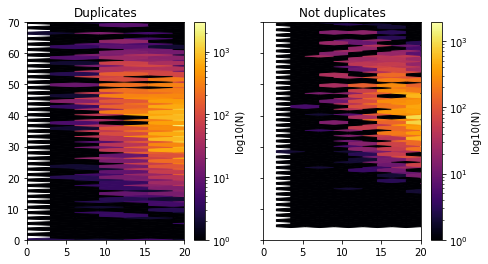

In [464]:
y = quora_train_data['Percentage'][quora_train_data['is_duplicate']==0].values
x = quora_train_data['Average'][quora_train_data['is_duplicate']==0].values

fig, axs = plt.subplots(ncols=2, sharey=True, figsize=(7, 4))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
ax = axs[0]
hb = ax.hexbin(x, y, gridsize=70, bins='log', cmap='inferno')
ax.axis([0, 20, 0, 70])
ax.set_title("Duplicates")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('log10(N)')


y = quora_train_data['Percentage'][quora_train_data['is_duplicate']==1].values
x = quora_train_data['Average'][quora_train_data['is_duplicate']==1].values
ax = axs[1]
hb = ax.hexbin(x, y, gridsize=70, bins='log', cmap='inferno')
ax.axis([0, 20, 0, 70])
ax.set_title("Not duplicates")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('log10(N)')

plt.show()

###  Scatter

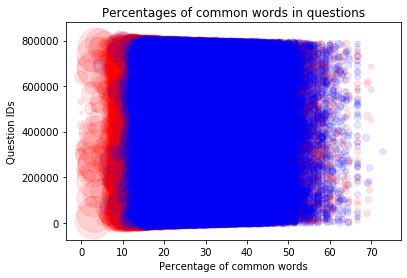

In [466]:
x = quora_train_data['Percentage'][quora_train_data['is_duplicate']==0].values
y = quora_train_data['qid1'][quora_train_data['is_duplicate']==0].values
area = quora_train_data['Average'][quora_train_data['is_duplicate']==0].values

plt.scatter(x, y, s=area*3, c='r', alpha=0.1)

x = quora_train_data['Percentage'][quora_train_data['is_duplicate']==1].values
y = quora_train_data['qid1'][quora_train_data['is_duplicate']==1].values
area = quora_train_data['Average'][quora_train_data['is_duplicate']==1].values

plt.scatter(x, y, s=area*3, c='b', alpha=0.1)

plt.ylabel('Question IDs')
plt.xlabel('Percentage of common words')

plt.title("Percentages of common words in questions")
plt.show()

## Cosine, Jaccard 
The first, naive approach towards identifying question pairs -- Strip the stopwords, stem the remaining and do a simple Cosine Test. However, a major drawback with the above is that of a lack of semantic understanding -- There might be two questions with a high percentage of common words, but different meanings.

In [471]:
import re, math
from collections import Counter
def get_cosine(vec1, vec2):
    vec1 = Counter(vec1)
    vec2 = Counter(vec2)
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in intersection])
    sum1 = sum([vec1[x]**2 for x in vec1.keys()])
    sum2 = sum([vec2[x]**2 for x in vec2.keys()])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)
    if not denominator:
        return 0.0
    else:
        return float(numerator) / denominator

In [472]:
quora_train_data['Cosine'] = quora_train_data.apply(lambda row: get_cosine(row['question1'],row['question2']), axis=1)
print(quora_train_data.head(n=5))

       id    qid1    qid2                                          question1  \
0  195840  386541  386542  [h, w,  , e,  , b, n, n, n, g,  , 5, 0, 0,  , ...   
1  252241  496583  496584  [w, h,  ,  , h, e,  , h, r, e,  , h, n, g,  , ...   
2  249224  490718  490719  [w, h,  , r, e,  , u, p,  ,  , p,  , c, p, e, ...   
3  125536  248723  248724  [ , w, n,  ,  , p, r, v, e,  ,  , r, e, n, g, ...   
4  390237  762803  762804  [h, w,  ,  ,  , g, n,  , w, e, g, h,  , n,  , ...   

                                           question2  is_duplicate  Common  \
0  [w, l, l,  , h, e,  , b, n,  , n,  , 5, 0, 0, ...             1      16   
1  [w, h,  ,  , h, e,  , h, r, e,  , h, n, g,  , ...             0      11   
2  [w, h,  , r, e,  , x,  , 4, 1,  ,  , p,  , c, ...             0       7   
3  [h, w,  , c, n,  , r, e, n, g,  , n, e, w, p, ...             0      11   
4         [h, w,  ,  , g, n,  , w, e, g, h,  ,  ,  ]             1       6   

   Average  Percentage    Cosine  
0     53.0   30

###  Jaccard Similarity
Jaccard Similarity is given by s=p/(p+q+r) where,

### p = # of attributes positive for both objects
### q = # of attributes 1 for i and 0 for j
### r = # of attributes 0 for i and 1 for j

In [473]:
quora_train_data['Jaccard'] = quora_train_data.apply(lambda row: 0 if (len(row['question1'])+len(row['question2'])-row['Common']) == 0  else float(row['Common'])/((len(row['question1'])+len(row['question2'])-row['Common'])), axis=1)
print(quora_train_data.head(n=5))

       id    qid1    qid2                                          question1  \
0  195840  386541  386542  [h, w,  , e,  , b, n, n, n, g,  , 5, 0, 0,  , ...   
1  252241  496583  496584  [w, h,  ,  , h, e,  , h, r, e,  , h, n, g,  , ...   
2  249224  490718  490719  [w, h,  , r, e,  , u, p,  ,  , p,  , c, p, e, ...   
3  125536  248723  248724  [ , w, n,  ,  , p, r, v, e,  ,  , r, e, n, g, ...   
4  390237  762803  762804  [h, w,  ,  ,  , g, n,  , w, e, g, h,  , n,  , ...   

                                           question2  is_duplicate  Common  \
0  [w, l, l,  , h, e,  , b, n,  , n,  , 5, 0, 0, ...             1      16   
1  [w, h,  ,  , h, e,  , h, r, e,  , h, n, g,  , ...             0      11   
2  [w, h,  , r, e,  , x,  , 4, 1,  ,  , p,  , c, ...             0       7   
3  [h, w,  , c, n,  , r, e, n, g,  , n, e, w, p, ...             0      11   
4         [h, w,  ,  , g, n,  , w, e, g, h,  ,  ,  ]             1       6   

   Average  Percentage    Cosine   Jaccard  
0    